In [11]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt     
import random                       
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
from packaging import version
# Load the TensorBoard notebook extension.
%load_ext tensorboard
import tensorboard

In [12]:
#Setting seed
tf.random.set_seed(12345)
tf.compat.v1.random.set_random_seed(12345)

In [13]:
# Load MNIST data
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [14]:
#Test train split
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0 
X_train, X_test = np.expand_dims(X_train, axis=-1), np.expand_dims(X_test, axis=-1)
print(X_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)


In [15]:
#Reshape data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

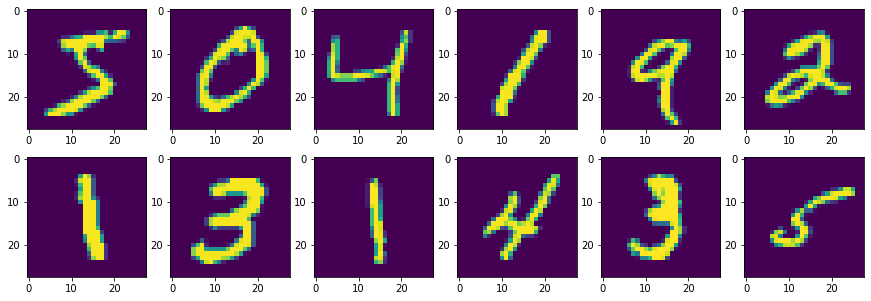

In [16]:
#Samples
from matplotlib.colors import Colormap
fig, axes = plt.subplots(nrows=2, ncols=6,figsize=(15,5))
ax = axes.ravel()
for i in range(12):
	ax[i].imshow(X_train[i].reshape(28,28))
plt.show()

A regular CNN where the number of filters in each layer increases as the depth of the network grows i.e., the Lth layer will have more filters than the (L-1)th layer:

In [17]:
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

#Building model
cnn_m1 = tf.keras.models.Sequential()
#Here, number of filters has been increased from 10 to 100
cnn_m1.add(tf.keras.layers.Conv2D(10, (3, 3), padding='same', activation='relu'))
cnn_m1.add(tf.keras.layers.Conv2D(20, (3, 3), padding='same', activation='relu'))
cnn_m1.add(tf.keras.layers.Conv2D(30, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_m1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
cnn_m1.add(tf.keras.layers.Conv2D(40, (3, 3), padding='same', activation='relu'))
cnn_m1.add(tf.keras.layers.Conv2D(50, (3, 3), padding='same', activation='relu'))
cnn_m1.add(tf.keras.layers.Conv2D(60, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_m1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
cnn_m1.add(tf.keras.layers.Conv2D(70, (3, 3), padding='same', activation='relu'))
cnn_m1.add(tf.keras.layers.Conv2D(80, (3, 3), padding='same', activation='relu'))
cnn_m1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
cnn_m1.add(tf.keras.layers.Conv2D(90, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_m1.add(tf.keras.layers.Conv2D(100, (3, 3), strides=(2, 2), padding='same', activation='relu'))

cnn_m1.add(tf.keras.layers.Flatten())
cnn_m1.add(tf.keras.layers.Dense(256))
cnn_m1.add(tf.keras.layers.Activation('relu'))
cnn_m1.add(tf.keras.layers.Dense(10))         #10 neurons to classify 10 different classes
cnn_m1.add(tf.keras.layers.Activation('softmax'))  #Since multiclass problem

cnn_m1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_m1.build(input_shape=(1,28,28,1))
accuracy= cnn_m1.fit(X_train, y_train, batch_size=512, epochs=10)
cnn_m1.summary()

Epoch 1/10
118/118 [==============================] - 9s 23ms/step - loss: 1.0964 - accuracy: 0.6161
Epoch 2/10
118/118 [==============================] - 2s 20ms/step - loss: 0.2588 - accuracy: 0.9199
Epoch 3/10
118/118 [==============================] - 2s 20ms/step - loss: 0.1159 - accuracy: 0.9645
Epoch 4/10
118/118 [==============================] - 2s 20ms/step - loss: 0.0790 - accuracy: 0.9757
Epoch 5/10
118/118 [==============================] - 2s 20ms/step - loss: 0.0673 - accuracy: 0.9787
Epoch 6/10
118/118 [==============================] - 2s 21ms/step - loss: 0.0523 - accuracy: 0.9831
Epoch 7/10
118/118 [==============================] - 3s 26ms/step - loss: 0.0471 - accuracy: 0.9848
Epoch 8/10
118/118 [==============================] - 2s 20ms/step - loss: 0.0406 - accuracy: 0.9875
Epoch 9/10
118/118 [==============================] - 3s 22ms/step - loss: 0.0361 - accuracy: 0.9886
Epoch 10/10
118/118 [==============================] - 2s 20ms/step - loss: 0.0297 - accura

In [18]:
# Evaluation
score = cnn_m1.evaluate(X_test, y_test)
print('Test loss for m1:', score[0])
print('Test accuracy for m1:', score[1])

313/313 [==============================] - 2s 4ms/step - loss: 0.0703 - accuracy: 0.9764
Test loss for model1: 0.07029374688863754
Test accuracy for model1: 0.9764000177383423


In [19]:
#Different learning rates
learningRate=[0.005, 0.01, 0.05, 0.1]
acc=np.zeros(4)
for i in range(len(learningRate)):

  cnn_m1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  cnn_m1.build(input_shape=(1,28,28,1))
  accuracy= cnn_m1.fit(X_train, y_train, batch_size=128, epochs=5)
  acc[i]=accuracy.history['accuracy'][4]
  cnn_m1.summary()

Epoch 1/5
469/469 [==============================] - 5s 8ms/step - loss: 0.0622 - accuracy: 0.9808
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0476 - accuracy: 0.9858
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0413 - accuracy: 0.9879
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0359 - accuracy: 0.9895
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0302 - accuracy: 0.9907
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 20)        1820      
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 30)        5430      
                     

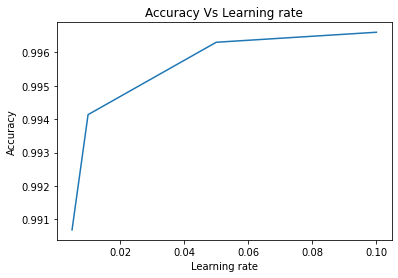

In [20]:
#Plot different learning rates
plt.plot(np.array(learningRate).reshape(4,1), np.array(acc).reshape(4,1))
plt.ylabel('Accuracy')
plt.xlabel('Learning rate')
plt.title('Accuracy Vs Learning rate')
plt.show()

According to the above plot, Higher the learning rate the better, So learning rate 0.10 gave best results.

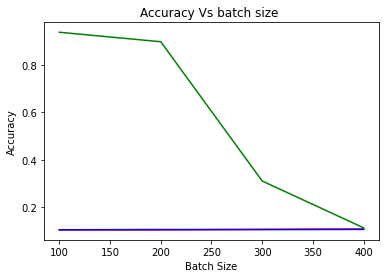

In [21]:
#learning rate = 0.10 , different batch sizes and optimisers
batch=[100, 200, 300, 400]
acc1=np.zeros(4)
acc2=np.zeros(4)
acc3=np.zeros(4)
for k in range(3):
  for i in range(len(batch)):    

        if k==0:
          opt_lr = tf.keras.optimizers.Adam(learning_rate=0.1)
          #Building m
          cnn_m1 = tf.keras.ms.Sequential()
          #Here, number of filters has been increased from 10 to 100
          cnn_m1.add(tf.keras.layers.Conv2D(10, (3, 3), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.Conv2D(20, (3, 3), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.Conv2D(30, (3, 3), strides=(2, 2), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
          cnn_m1.add(tf.keras.layers.Conv2D(40, (3, 3), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.Conv2D(50, (3, 3), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.Conv2D(60, (3, 3), strides=(2, 2), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
          cnn_m1.add(tf.keras.layers.Conv2D(70, (3, 3), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.Conv2D(80, (3, 3), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
          cnn_m1.add(tf.keras.layers.Conv2D(90, (3, 3), strides=(2, 2), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.Conv2D(100, (3, 3), strides=(2, 2), padding='same', activation='relu'))

          cnn_m1.add(tf.keras.layers.Flatten())
          cnn_m1.add(tf.keras.layers.Dense(256))
          cnn_m1.add(tf.keras.layers.Activation('relu'))
          cnn_m1.add(tf.keras.layers.Dense(10))         #10 neurons to classify 10 different classes
          cnn_m1.add(tf.keras.layers.Activation('softmax'))  #Since multiclass problem
          cnn_m1.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_m1.build(input_shape=(1,28,28,1))  
          accuracy1= cnn_m1.fit(X_train, y_train,
              batch_size=batch[i], epochs=5,
              verbose=0)   
          acc1[i]=accuracy1.history['accuracy'][4]
        
        elif k==1:
          opt_lr = tf.keras.optimizers.SGD(learning_rate=0.1)
          cnn_m1 = tf.keras.ms.Sequential()
          #Here, number of filters has been increased from 10 to 100
          cnn_m1.add(tf.keras.layers.Conv2D(10, (3, 3), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.Conv2D(20, (3, 3), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.Conv2D(30, (3, 3), strides=(2, 2), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
          cnn_m1.add(tf.keras.layers.Conv2D(40, (3, 3), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.Conv2D(50, (3, 3), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.Conv2D(60, (3, 3), strides=(2, 2), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
          cnn_m1.add(tf.keras.layers.Conv2D(70, (3, 3), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.Conv2D(80, (3, 3), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
          cnn_m1.add(tf.keras.layers.Conv2D(90, (3, 3), strides=(2, 2), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.Conv2D(100, (3, 3), strides=(2, 2), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.Flatten())
          cnn_m1.add(tf.keras.layers.Dense(256))
          cnn_m1.add(tf.keras.layers.Activation('relu'))
          cnn_m1.add(tf.keras.layers.Dense(10))         #10 neurons to classify 10 different classes
          cnn_m1.add(tf.keras.layers.Activation('softmax'))  #Since multiclass problem
          cnn_m1.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_m1.build(input_shape=(1,28,28,1))  
          accuracy2= cnn_m1.fit(X_train, y_train,
              batch_size=batch[i], epochs=5,
              verbose=0)   
          acc2[i]=accuracy2.history['accuracy'][4]

        
        elif k==2:
          opt_lr = tf.keras.optimizers.RMSprop(learning_rate=0.1)
          cnn_m1 = tf.keras.ms.Sequential()
          #Here, number of filters has been increased from 10 to 100
          cnn_m1.add(tf.keras.layers.Conv2D(10, (3, 3), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.Conv2D(20, (3, 3), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.Conv2D(30, (3, 3), strides=(2, 2), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
          cnn_m1.add(tf.keras.layers.Conv2D(40, (3, 3), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.Conv2D(50, (3, 3), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.Conv2D(60, (3, 3), strides=(2, 2), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
          cnn_m1.add(tf.keras.layers.Conv2D(70, (3, 3), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.Conv2D(80, (3, 3), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
          cnn_m1.add(tf.keras.layers.Conv2D(90, (3, 3), strides=(2, 2), padding='same', activation='relu'))
          cnn_m1.add(tf.keras.layers.Conv2D(100, (3, 3), strides=(2, 2), padding='same', activation='relu'))

          cnn_m1.add(tf.keras.layers.Flatten())
          cnn_m1.add(tf.keras.layers.Dense(256))
          cnn_m1.add(tf.keras.layers.Activation('relu'))
          cnn_m1.add(tf.keras.layers.Dense(10))         #10 neurons to classify 10 different classes
          cnn_m1.add(tf.keras.layers.Activation('softmax'))  #Since multiclass problem
          cnn_m1.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_m1.build(input_shape=(1,28,28,1))  
          accuracy3= cnn_m1.fit(X_train, y_train,
              batch_size=batch[i], epochs=5,
              verbose=0)   
          acc3[i]=accuracy3.history['accuracy'][4]

plt.plot(np.array(batch).reshape(4,1), np.array(acc1).reshape(4,1), color = 'red', label='Adam')
plt.plot(np.array(batch).reshape(4,1), np.array(acc2).reshape(4,1), color = 'green', label='SGD')
plt.plot(np.array(batch).reshape(4,1), np.array(acc3).reshape(4,1), color = 'blue', label='RMSProp')
plt.ylabel('Accuracy')
plt.xlabel('Batch Size')
plt.title('Accuracy Vs batch size ')
plt.show()

When learning rate = 0.10, batchsize =200, SGD gave better performence

In [22]:
#SGD final m
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
opt_lr = tf.keras.optimizers.SGD(learning_rate=0.1)

cnn_m1 = tf.keras.ms.Sequential()
#Number of filters from 10 to 100
cnn_m1.add(tf.keras.layers.Conv2D(10, (3, 3), padding='same', activation='relu'))
cnn_m1.add(tf.keras.layers.Conv2D(20, (3, 3), padding='same', activation='relu'))
cnn_m1.add(tf.keras.layers.Conv2D(30, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_m1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
cnn_m1.add(tf.keras.layers.Conv2D(40, (3, 3), padding='same', activation='relu'))
cnn_m1.add(tf.keras.layers.Conv2D(50, (3, 3), padding='same', activation='relu'))
cnn_m1.add(tf.keras.layers.Conv2D(60, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_m1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
cnn_m1.add(tf.keras.layers.Conv2D(70, (3, 3), padding='same', activation='relu'))
cnn_m1.add(tf.keras.layers.Conv2D(80, (3, 3), padding='same', activation='relu'))
cnn_m1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
cnn_m1.add(tf.keras.layers.Conv2D(90, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_m1.add(tf.keras.layers.Conv2D(100, (3, 3), strides=(2, 2), padding='same', activation='relu'))

cnn_m1.add(tf.keras.layers.Flatten())
cnn_m1.add(tf.keras.layers.Dense(256))
cnn_m1.add(tf.keras.layers.Activation('relu'))
cnn_m1.add(tf.keras.layers.Dense(10))         #10 neurons to classify 10 different classes
cnn_m1.add(tf.keras.layers.Activation('softmax'))  #Since multiclass problem

cnn_m1.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
cnn_m1.build(input_shape=(1,28,28,1))
accuracy= cnn_m1.fit(X_train, y_train, batch_size=200, epochs=10)  #Since batch size=200 worked best
cnn_m1.summary()

Epoch 1/10
300/300 [==============================] - 4s 10ms/step - loss: 2.3015 - accuracy: 0.1118
Epoch 2/10
300/300 [==============================] - 3s 10ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 3/10
300/300 [==============================] - 3s 10ms/step - loss: 2.3009 - accuracy: 0.1124
Epoch 4/10
300/300 [==============================] - 3s 10ms/step - loss: 2.2742 - accuracy: 0.1462
Epoch 5/10
300/300 [==============================] - 3s 10ms/step - loss: 1.4524 - accuracy: 0.4513
Epoch 6/10
300/300 [==============================] - 3s 10ms/step - loss: 0.2699 - accuracy: 0.9191
Epoch 7/10
300/300 [==============================] - 3s 10ms/step - loss: 0.1253 - accuracy: 0.9632
Epoch 8/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0866 - accuracy: 0.9748
Epoch 9/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0723 - accuracy: 0.9786
Epoch 10/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0551 - accura

In [23]:
# Evaluation final SGD m
score = cnn_m1.evaluate(X_test, y_test)
print('Test loss for m1:', score[0])
print('Test accuracy for m1:', score[1])
#Test accuracy increased to 0.9824

313/313 [==============================] - 1s 4ms/step - loss: 0.0606 - accuracy: 0.9824
Test loss for m1: 0.06055706739425659
Test accuracy for m1: 0.9824000000953674


An inverted CNN where the number of filters in each layer decreases as the depth of the network grows i.e., the Lth layer will have less filters than the (L-1)th layer:-

In [25]:
#m 2
cnn_m2 = tf.keras.models.Sequential()
#Number of filters from 100 to 10
cnn_m2.add(tf.keras.layers.Conv2D(100, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_m2.add(tf.keras.layers.Conv2D(90, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_m2.add(tf.keras.layers.Conv2D(80, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_m2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
cnn_m2.add(tf.keras.layers.Conv2D(70, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_m2.add(tf.keras.layers.Conv2D(60, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_m2.add(tf.keras.layers.Conv2D(50, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_m2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
cnn_m2.add(tf.keras.layers.Conv2D(40, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_m2.add(tf.keras.layers.Conv2D(30, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_m2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
cnn_m2.add(tf.keras.layers.Conv2D(20, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_m2.add(tf.keras.layers.Conv2D(10, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_m2.add(tf.keras.layers.Flatten())
cnn_m2.add(tf.keras.layers.Dense(256))
cnn_m2.add(tf.keras.layers.Activation('relu'))
#10 different classes
cnn_m2.add(tf.keras.layers.Dense(10))  
#Multiclass problem      
cnn_m2.add(tf.keras.layers.Activation('softmax'))   
cnn_m2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_m2.build(input_shape=(1,28,28,1))
cnn_m2.summary()
accuracy= cnn_m2.fit(X_train, y_train, batch_size=512, epochs=5) 

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_143 (Conv2D)         (1, 28, 28, 100)          1000      
                                                                 
 conv2d_144 (Conv2D)         (1, 28, 28, 90)           81090     
                                                                 
 conv2d_145 (Conv2D)         (1, 28, 28, 80)           64880     
                                                                 
 max_pooling2d_44 (MaxPoolin  (1, 14, 14, 80)          0         
 g2D)                                                            
                                                                 
 conv2d_146 (Conv2D)         (1, 14, 14, 70)           50470     
                                                                 
 conv2d_147 (Conv2D)         (1, 14, 14, 60)           37860     
                                                     

In [26]:
# Evaluation - model2
score = cnn_m2.evaluate(X_test, y_test)
print('Test loss for model2:', score[0])
print('Test accuracy for model2:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0292 - accuracy: 0.9898
Test loss for model2: 0.02923540584743023
Test accuracy for model2: 0.989799976348877


Different Hyperparameters:-

Epoch 1/5
469/469 [==============================] - 17s 33ms/step - loss: 0.0588 - accuracy: 0.9829
Epoch 2/5
469/469 [==============================] - 16s 33ms/step - loss: 0.0402 - accuracy: 0.9874
Epoch 3/5
469/469 [==============================] - 16s 35ms/step - loss: 0.0338 - accuracy: 0.9896
Epoch 4/5
469/469 [==============================] - 17s 35ms/step - loss: 0.0284 - accuracy: 0.9912
Epoch 5/5
469/469 [==============================] - 16s 34ms/step - loss: 0.0233 - accuracy: 0.9930
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_143 (Conv2D)         (None, 28, 28, 100)       1000      
                                                                 
 conv2d_144 (Conv2D)         (None, 28, 28, 90)        81090     
                                                                 
 conv2d_145 (Conv2D)         (None, 28, 28, 80)        64880     
          

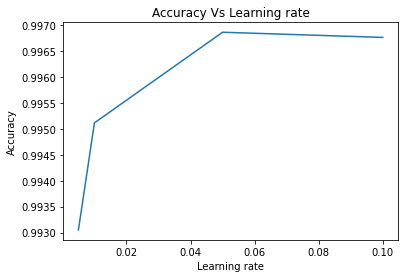

In [27]:
#different learning rate
learningRate=[0.005, 0.01, 0.05, 0.1]
acc=np.zeros(4)
for i in range(len(learningRate)):
  cnn_m2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  cnn_m2.build(input_shape=(1,28,28,1))
  accuracy= cnn_m2.fit(X_train, y_train, batch_size=128, epochs=5)
  acc[i]=accuracy.history['accuracy'][4]
  cnn_m2.summary()

plt.plot(np.array(learningRate).reshape(4,1), np.array(acc).reshape(4,1))
plt.ylabel('Accuracy')
plt.xlabel('Learning rate')
plt.title('Accuracy Vs Learning rate')
plt.show()

In [ ]:
#learning rate =0.10, different batch sizes and optimizers
batch=[100, 200, 300, 400]
acc1=np.zeros(4)
acc2=np.zeros(4)
acc3=np.zeros(4)
for k in range(3):
  for i in range(len(batch)):    

        if k==0:
          opt_lr = tf.keras.optimizers.Adam(learning_rate=0.1)
          #Building model
          cnn_m2 = tf.keras.models.Sequential()
          #Here, number of filters has been decreased from 100 to 10
          cnn_m2.add(tf.keras.layers.Conv2D(100, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_m2.add(tf.keras.layers.Conv2D(90, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_m2.add(tf.keras.layers.Conv2D(80, kernel_size = (3,3), padding= 'same', activation='relu'))

          cnn_m2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

          cnn_m2.add(tf.keras.layers.Conv2D(70, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_m2.add(tf.keras.layers.Conv2D(60, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_m2.add(tf.keras.layers.Conv2D(50, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_m2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
          cnn_m2.add(tf.keras.layers.Conv2D(40, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_m2.add(tf.keras.layers.Conv2D(30, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_m2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
          cnn_m2.add(tf.keras.layers.Conv2D(20, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_m2.add(tf.keras.layers.Conv2D(10, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_m2.add(tf.keras.layers.Flatten())
          cnn_m2.add(tf.keras.layers.Dense(256))
          cnn_m2.add(tf.keras.layers.Activation('relu'))
           #10 different classes
          cnn_m2.add(tf.keras.layers.Dense(10))       
          cnn_m2.add(tf.keras.layers.Activation('softmax'))   \
          #Multiclass problem
          cnn_m2.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_m2.build(input_shape=(1,28,28,1))  
          accuracy1= cnn_m2.fit(X_train, y_train,
              batch_size=batch[i], epochs=5,
              verbose=0)   
          acc1[i]=accuracy1.history['accuracy'][4]
        
        elif k==1:
          opt_lr = tf.keras.optimizers.SGD(learning_rate=0.1)
          cnn_m2 = tf.keras.models.Sequential()
          #Number of filters from 100 to 10
          cnn_m2.add(tf.keras.layers.Conv2D(100, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_m2.add(tf.keras.layers.Conv2D(90, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_m2.add(tf.keras.layers.Conv2D(80, kernel_size = (3,3), padding= 'same', activation='relu'))

          cnn_m2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

          cnn_m2.add(tf.keras.layers.Conv2D(70, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_m2.add(tf.keras.layers.Conv2D(60, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_m2.add(tf.keras.layers.Conv2D(50, kernel_size = (3,3), padding= 'same', activation='relu'))

          cnn_m2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

          cnn_m2.add(tf.keras.layers.Conv2D(40, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_m2.add(tf.keras.layers.Conv2D(30, kernel_size = (3,3), padding= 'same', activation='relu'))

          cnn_m2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

          cnn_m2.add(tf.keras.layers.Conv2D(20, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_m2.add(tf.keras.layers.Conv2D(10, kernel_size = (3,3), padding= 'same', activation='relu'))

          cnn_m2.add(tf.keras.layers.Flatten())
          cnn_m2.add(tf.keras.layers.Dense(256))
          cnn_m2.add(tf.keras.layers.Activation('relu'))
          cnn_m2.add(tf.keras.layers.Dense(10))        #10 neurons to classify 10 different classes
          cnn_m2.add(tf.keras.layers.Activation('softmax'))   #Multiclass problem
          cnn_m2.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_m2.build(input_shape=(1,28,28,1))  
          accuracy2= cnn_m2.fit(X_train, y_train,
              batch_size=batch[i], epochs=5,
              verbose=0)   
          acc2[i]=accuracy2.history['accuracy'][4]

        
        elif k==2:
          opt_lr = tf.keras.optimizers.RMSprop(learning_rate=0.1)
          cnn_m2 = tf.keras.models.Sequential()
          #Here, number of filters has been decreased from 100 to 10
          cnn_m2.add(tf.keras.layers.Conv2D(100, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_m2.add(tf.keras.layers.Conv2D(90, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_m2.add(tf.keras.layers.Conv2D(80, kernel_size = (3,3), padding= 'same', activation='relu'))

          cnn_m2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

          cnn_m2.add(tf.keras.layers.Conv2D(70, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_m2.add(tf.keras.layers.Conv2D(60, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_m2.add(tf.keras.layers.Conv2D(50, kernel_size = (3,3), padding= 'same', activation='relu'))

          cnn_m2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

          cnn_m2.add(tf.keras.layers.Conv2D(40, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_m2.add(tf.keras.layers.Conv2D(30, kernel_size = (3,3), padding= 'same', activation='relu'))

          cnn_m2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

          cnn_m2.add(tf.keras.layers.Conv2D(20, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_m2.add(tf.keras.layers.Conv2D(10, kernel_size = (3,3), padding= 'same', activation='relu'))

          cnn_m2.add(tf.keras.layers.Flatten())
          cnn_m2.add(tf.keras.layers.Dense(256))
          cnn_m2.add(tf.keras.layers.Activation('relu'))
          cnn_m2.add(tf.keras.layers.Dense(10))        
          #10 different classes
          cnn_m2.add(tf.keras.layers.Activation('softmax'))   
          #Multiclass problem
          cnn_m2.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_m2.build(input_shape=(1,28,28,1))  
          accuracy3= cnn_m2.fit(X_train, y_train,
              batch_size=batch[i], epochs=5,
              verbose=0)   
          acc3[i]=accuracy3.history['accuracy'][4]


plt.plot(np.array(batch).reshape(4,1), np.array(acc1).reshape(4,1), color = 'red', label='Adam')
plt.plot(np.array(batch).reshape(4,1), np.array(acc2).reshape(4,1), color = 'green', label='SGD')
plt.plot(np.array(batch).reshape(4,1), np.array(acc3).reshape(4,1), color = 'blue', label='RMSProp')
plt.ylabel('Accuracy')
plt.xlabel('Batch Size')
plt.title('Accuracy Vs combinations of batch size and optimizers')
plt.show()

FOr mOdel 2 SGD gave betyter performence but batch size has no impact and learning rate = 0.10 works best

In [ ]:
#Final model 2
opt_lr = tf.keras.optimizers.SGD(learning_rate=0.1)
#Building model
cnn_m2 = tf.keras.models.Sequential()
#Here, number of filters has been decreased from 100 to 10
cnn_m2.add(tf.keras.layers.Conv2D(100, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_m2.add(tf.keras.layers.Conv2D(90, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_m2.add(tf.keras.layers.Conv2D(80, kernel_size = (3,3), padding= 'same', activation='relu'))

cnn_m2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_m2.add(tf.keras.layers.Conv2D(70, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_m2.add(tf.keras.layers.Conv2D(60, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_m2.add(tf.keras.layers.Conv2D(50, kernel_size = (3,3), padding= 'same', activation='relu'))

cnn_m2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_m2.add(tf.keras.layers.Conv2D(40, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_m2.add(tf.keras.layers.Conv2D(30, kernel_size = (3,3), padding= 'same', activation='relu'))

cnn_m2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_m2.add(tf.keras.layers.Conv2D(20, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_m2.add(tf.keras.layers.Conv2D(10, kernel_size = (3,3), padding= 'same', activation='relu'))

cnn_m2.add(tf.keras.layers.Flatten())
cnn_m2.add(tf.keras.layers.Dense(256))
cnn_m2.add(tf.keras.layers.Activation('relu'))
cnn_m2.add(tf.keras.layers.Dense(10))        
#10 different classes
cnn_m2.add(tf.keras.layers.Activation('softmax'))   \
#Multiclass problem
cnn_m2.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
cnn_m2.build(input_shape=(1,28,28,1))
cnn_m2.summary()

accuracy= cnn_m2.fit(X_train, y_train, batch_size=100, epochs=5) 

In [ ]:
# Evaluating the final model 2
score = cnn_m2.evaluate(X_test, y_test)
print('Test loss for model1:', score[0])
print('Test accuracy for model1:', score[1])

Accuracy improved to 0.99.

An hour-glass shaped CNN where the number of filters will increase till the Lth layer and reduce afterwards:-

In [ ]:
#Building model
cnn_model3 = tf.keras.models.Sequential()
#Number of filters from 50 to 100 and then from 100 to 50
cnn_model3.add(tf.keras.layers.Conv2D(50, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(60, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(70, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_model3.add(tf.keras.layers.Conv2D(80, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(90, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(100, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_model3.add(tf.keras.layers.Conv2D(90, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(80, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(70, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_model3.add(tf.keras.layers.Conv2D(60, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(50, kernel_size = (3,3), padding= 'same', activation='relu'))

cnn_model3.add(tf.keras.layers.Flatten())
cnn_model3.add(tf.keras.layers.Dense(10))                        #10 neurons to classify 10 different classes
cnn_model3.add(tf.keras.layers.Activation('softmax'))

cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model3.build(input_shape=(1,28,28,1))
cnn_model3.summary()

accuracy= cnn_model3.fit(X_train, y_train, batch_size=512, epochs=5)

In [ ]:
# Evaluation model3
score = cnn_model3.evaluate(X_test, y_test)
print('Test loss for model3:', score[0])
print('Test accuracy for model3:', score[1])

In [ ]:
#4 different learning rate will be tested at first
learningRate=[0.005, 0.01, 0.05, 0.1]
acc=np.zeros(4)
for i in range(len(learningRate)):
  cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  cnn_model3.build(input_shape=(1,28,28,1))
  accuracy= cnn_model3.fit(X_train, y_train, batch_size=128, epochs=5)
  acc[i]=accuracy.history['accuracy'][4]
  cnn_model3.summary()

plt.plot(np.array(learningRate).reshape(4,1), np.array(acc).reshape(4,1))
plt.ylabel('Accuracy')
plt.xlabel('Learning rate')
plt.title('Accuracy Vs combinations of batch size and optimizers')
plt.show()

In [ ]:
#Now, with 0.1 learning rate, I will try different combinations of batch size and optimizers
batch=[100, 200, 300, 400]
acc1=np.zeros(4)
acc2=np.zeros(4)
acc3=np.zeros(4)
for k in range(3):
  for i in range(len(batch)):    

        if k==0:
          opt_lr = tf.keras.optimizers.Adam(learning_rate=0.1)
          cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_model3.build(input_shape=(1,28,28,1)) 
          #model.summary() 
          accuracy1= cnn_model3.fit(X_train, y_train,
              batch_size=batch[i], epochs=5, verbose=0) 
          acc1[i]=accuracy1.history['accuracy'][4]
        
        elif k==1:
          opt_lr = tf.keras.optimizers.SGD(learning_rate=0.1)
          cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_model3.build(input_shape=(1,28,28,1)) 
          #model.summary() 
          accuracy2= cnn_model3.fit(X_train, y_train,
              batch_size=batch[i], epochs=5,
              verbose=0)
          acc2[i]=accuracy2.history['accuracy'][4]

        
        elif k==2:
          opt_lr = tf.keras.optimizers.RMSprop(learning_rate=0.1)
          cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_model3.build(input_shape=(1,28,28,1))  
          #model.summary() 
          accuracy3= cnn_model3.fit(X_train, y_train,
              batch_size=batch[i], epochs=5,
              verbose=0)   
          acc3[i]=accuracy3.history['accuracy'][4]

plt.plot(np.array(batch).reshape(4,1), np.array(acc1).reshape(4,1), color = 'red', label='Adam')
plt.plot(np.array(batch).reshape(4,1), np.array(acc2).reshape(4,1), color = 'green', label='SGD')
plt.plot(np.array(batch).reshape(4,1), np.array(acc3).reshape(4,1), color = 'blue', label='RMSProp')
plt.ylabel('Accuracy')
plt.xlabel('Batch Size')
plt.title('Accuracy Vs combinations of batch size and optimizers')
plt.show()

In [ ]:
#Final model 3
opt_lr = tf.keras.optimizers.SGD(learning_rate=0.1)

#Building model
cnn_model3 = tf.keras.models.Sequential()
#Here, number of filters has been increased from 50 to 100 and then decreased from 100 to 50
cnn_model3.add(tf.keras.layers.Conv2D(50, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(60, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(70, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_model3.add(tf.keras.layers.Conv2D(80, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(90, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(100, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_model3.add(tf.keras.layers.Conv2D(90, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(80, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(70, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_model3.add(tf.keras.layers.Conv2D(60, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(50, kernel_size = (3,3), padding= 'same', activation='relu'))

cnn_model3.add(tf.keras.layers.Flatten())
cnn_model3.add(tf.keras.layers.Dense(10))                        #10 neurons to classify 10 different classes
cnn_model3.add(tf.keras.layers.Activation('softmax'))

cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model3.build(input_shape=(1,28,28,1))
cnn_model3.summary()

accuracy= cnn_model3.fit(X_train, y_train, batch_size=300, epochs=5)

In [ ]:
# Evaluating the final model
score = cnn_model3.evaluate(X_test, y_test)
print('Test loss for model1:', score[0])
print('Test accuracy for model1:', score[1])

Accuracy came out to be 0.99

QUESTION 2

In [3]:
#loading the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data() 

In [4]:
#Reshape data 
x_train=x_train.reshape(50000,32,32,3) 
x_test=x_test.reshape(10000,32,32,3) 

x_train=x_train.astype('float32') 
x_test=x_test.astype('float32')

In [5]:
#Normalization
x_train /=255 
x_test /=255
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [6]:
#LetNet with 7 layer output

m = tf.keras.ms.Sequential()
m.add(tf.keras.layers.Conv2D(6, (5, 5),strides=(1,1), padding='same', activation='relu'))
m.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
m.add(tf.keras.layers.Conv2D(16, (5, 5),strides=(1,1), padding='same', activation='relu'))
m.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
m.add(tf.keras.layers.Conv2D(120, (5, 5), padding='same', activation='relu'))
m.add(tf.keras.layers.Flatten())
m.add(tf.keras.layers.Dense(120))
m.add(tf.keras.layers.Activation('relu'))
m.add(tf.keras.layers.Dense(84))
m.add(tf.keras.layers.Activation('relu'))
#10 predicted classes
m.add(tf.keras.layers.Dense(10)) 
m.add(tf.keras.layers.Activation('softmax'))
opt_lr = tf.keras.optimizers.Adam(learning_rate=0.01)
m.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
m.build(input_shape=(128,32,32,3)) 
m.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (128, 32, 32, 6)          456       
                                                                 
 max_pooling2d (MaxPooling2D  (128, 16, 16, 6)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (128, 16, 16, 16)         2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (128, 8, 8, 16)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (128, 8, 8, 120)          48120     
                                                                 
 flatten (Flatten)           (128, 7680)               0

In [ ]:
#25 epochs
m.fit(x_train, y_train,
          batch_size=128, epochs=25, verbose=1) 

Epoch 1/25
391/391 [==============================] - 10s 6ms/step - loss: 2.3102 - accuracy: 0.1008
Epoch 2/25
391/391 [==============================] - 2s 5ms/step - loss: 2.3033 - accuracy: 0.0989
Epoch 3/25
391/391 [==============================] - 2s 5ms/step - loss: 2.3033 - accuracy: 0.0985
Epoch 4/25
391/391 [==============================] - 2s 5ms/step - loss: 2.3032 - accuracy: 0.0974
Epoch 5/25
391/391 [==============================] - 2s 5ms/step - loss: 2.3032 - accuracy: 0.0992
Epoch 6/25
391/391 [==============================] - 2s 5ms/step - loss: 2.3033 - accuracy: 0.1005
Epoch 7/25
391/391 [==============================] - 2s 5ms/step - loss: 2.3033 - accuracy: 0.0979
Epoch 8/25
391/391 [==============================] - 2s 5ms/step - loss: 2.3033 - accuracy: 0.0982
Epoch 9/25
391/391 [==============================] - 2s 5ms/step - loss: 2.3034 - accuracy: 0.0998
Epoch 10/25
391/391 [==============================] - 2s 5ms/step - loss: 2.3032 - accuracy: 0.099

#Different learning rates:-

In [ ]:
#different learning rates
learningRate=[0.001, 0.005, 0.01, 0.05, 0.1]
acc=np.zeros(5)
for i in range(len(learningRate)):
    opt_lr = tf.keras.optimizers.Adam(learning_rate=learningRate[i]) 
    m.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
    m.build(input_shape=(128,32,32,3)) 
    accuracy= m.fit(x_train, y_train,
          batch_size=128, epochs=25,
          verbose=0) 
    acc[i]=accuracy.history['accuracy'][24]

[0.09646 0.09982 0.10036 0.102   0.09898]


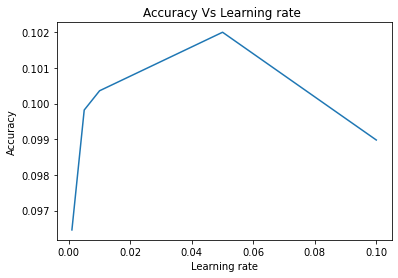

In [ ]:
#Plot - learning rates
print(acc)
plt.plot(np.array(learningRate).reshape(5,1), np.array(acc).reshape(5,1))
plt.ylabel('Accuracy')
plt.xlabel('Learning rate')
plt.title('Accuracy Vs Learning rate ')
plt.show()

#According to the above plot, as the learning rate inceased accuracy decreased. So 0.001 is the best learning rate for the m.


#Different batch sizes:-

In [11]:
#Learning rate = 0.001
batch=[100, 200, 300, 400, 500]
acc=np.zeros(5)
for i in range(len(batch)):
    m = tf.keras.ms.Sequential()
    m.add(tf.keras.layers.Conv2D(6, (5, 5),strides=(1,1), padding='same', activation='relu'))
    m.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    m.add(tf.keras.layers.Conv2D(16, (5, 5),strides=(1,1), padding='same', activation='relu'))
    m.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    m.add(tf.keras.layers.Conv2D(120, (5, 5), padding='same', activation='relu'))
    m.add(tf.keras.layers.Flatten())
    m.add(tf.keras.layers.Dense(84))
    m.add(tf.keras.layers.Activation('relu'))
    m.add(tf.keras.layers.Dense(10)) 
    m.add(tf.keras.layers.Activation('softmax'))
    opt_lr = tf.keras.optimizers.Adam(learning_rate=0.001) 
    m.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
    m.build(input_shape=(128,32,32,3)) 
    accuracy= m.fit(x_train, y_train,
          batch_size=batch[i], epochs=25,
          verbose=0) 
    acc[i]=accuracy.history['accuracy'][24]   


[0.97564    0.96112001 0.91082001 0.89197999 0.85241997]


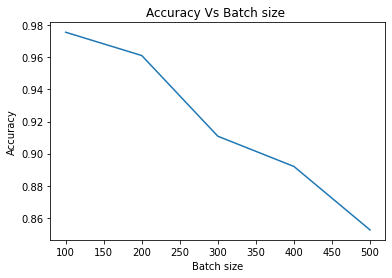

In [12]:
#Plot - batch sizes
print(acc)
plt.plot(np.array(batch).reshape(5,1), np.array(acc).reshape(5,1))
plt.ylabel('Accuracy')
plt.xlabel('Batch size')
plt.title('Accuracy Vs Batch size ')
plt.show()

#Using learning rate = 0.001 which cmae out to be best, we observe that the performance decreased as the batch size increased So 100 batchsize is best for the m.

# Hyperparameters:-

In [ ]:
#Adam optimizer
batch=[100, 200, 300, 400, 500]
learningRate=[0.001, 0.005, 0.01, 0.05, 0.1]

for i in range(len(batch)):
    for j in range(len(learningRate)):
      m = tf.keras.ms.Sequential()
      m.add(tf.keras.layers.Conv2D(6, (5, 5),strides=(1,1), padding='same', activation='relu'))
      m.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
      m.add(tf.keras.layers.Conv2D(16, (5, 5),strides=(1,1), padding='same', activation='relu'))
      m.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
      m.add(tf.keras.layers.Conv2D(120, (5, 5), padding='same', activation='relu'))
      m.add(tf.keras.layers.Flatten())
      m.add(tf.keras.layers.Dense(84))
      m.add(tf.keras.layers.Activation('relu'))
      m.add(tf.keras.layers.Dense(10)) 
      m.add(tf.keras.layers.Activation('softmax'))
      opt_lr = tf.keras.optimizers.Adam(learning_rate=learningRate[j])
      m.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
      m.build(input_shape=(128,32,32,3)) 
      m.summary() 
      accuracy= m.fit(x_train, y_train,
          batch_size=batch[i], epochs=25,
          verbose=0) # here I use batch size 128 and 25 epochs
      print(i,j, accuracy.history['accuracy'][24])

0 0 0.965719997882843
0 1 0.09746000170707703
0 2 0.0995199978351593
0 3 0.10134000331163406
0 4 0.0989999994635582
1 0 0.9609799981117249
1 1 0.9058799743652344
1 2 0.10051999986171722
1 3 0.09706000238656998
1 4 0.09715999662876129
2 0 0.9478200078010559
2 1 0.9144799709320068
2 2 0.10006000101566315
2 3 0.09774000197649002
2 4 0.09826000034809113
3 0 0.8789600133895874
3 1 0.8812800049781799
3 2 0.10171999782323837
3 3 0.10034000128507614
3 4 0.10044000297784805
4 0 0.8784400224685669
4 1 0.8947200179100037
4 2 0.0983399972319603
4 3 0.10022000223398209
4 4 0.1005999967455864


In [ ]:
#SGD optimizer
batch=[100, 200, 300, 400, 500]
learningRate=[0.001, 0.005, 0.01, 0.05, 0.1]
for i in range(len(batch)):
    for j in range(len(learningRate)):
      m = tf.keras.ms.Sequential()
      m.add(tf.keras.layers.Conv2D(6, (5, 5),strides=(1,1), padding='same', activation='relu'))
      m.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
      m.add(tf.keras.layers.Conv2D(16, (5, 5),strides=(1,1), padding='same', activation='relu'))
      m.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
      m.add(tf.keras.layers.Conv2D(120, (5, 5), padding='same', activation='relu'))
      m.add(tf.keras.layers.Flatten())
      m.add(tf.keras.layers.Dense(84))
      m.add(tf.keras.layers.Activation('relu'))
      m.add(tf.keras.layers.Dense(10)) 
      m.add(tf.keras.layers.Activation('softmax'))
      opt_lr = tf.keras.optimizers.SGD(learning_rate=learningRate[j])
      m.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
      m.build(input_shape=(128,32,32,3)) 
      m.summary() 
      accuracy= m.fit(x_train, y_train,
          batch_size=batch[i], epochs=25,
          verbose=0) # here I use batch size 128 and 25 epochs
      print(i,j,accuracy.history['accuracy'][24])

0 0 0.40397998690605164
0 1 0.6482200026512146
0 2 0.7182000279426575
0 3 0.9747800230979919
0 4 0.9760599732398987
1 0 0.357699990272522
1 1 0.5532000064849854
1 2 0.641539990901947
1 3 0.9413800239562988
1 4 0.9962199926376343
2 0 0.3387199938297272
2 1 0.504800021648407
2 2 0.5717800259590149
2 3 0.8509399890899658
2 4 0.966759979724884
3 0 0.21187999844551086
3 1 0.4783799946308136
3 2 0.5361800193786621
3 3 0.7781400084495544
3 4 0.8931599855422974
4 0 0.22227999567985535
4 1 0.45320001244544983
4 2 0.511680006980896
4 3 0.6906800270080566
4 4 0.8607400059700012


#Feed forward network - each hidden layer containing the same number of neurons as the number of filters in each convolution layer. optimizer=adam, Epochs =25 :-

In [7]:
m = tf.keras.ms.Sequential()
m.add(tf.keras.layers.Flatten())
m.add(tf.keras.layers.Dense(456))
m.add(tf.keras.layers.Activation('relu'))
m.add(tf.keras.layers.Dense(2416))
m.add(tf.keras.layers.Activation('relu'))
m.add(tf.keras.layers.Dense(48120))
m.add(tf.keras.layers.Activation('relu'))
m.add(tf.keras.layers.Dense(10))
m.add(tf.keras.layers.Activation('softmax'))
m.build(input_shape=(128, 32,32,3))
m.summary()
opt_lr = tf.keras.optimizers.Adam(learning_rate=0.001)
m.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
m.fit(x_train, y_train,
          batch_size=128, epochs=25,
          verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (128, 3072)               0         
                                                                 
 dense_3 (Dense)             (128, 456)                1401288   
                                                                 
 activation_3 (Activation)   (128, 456)                0         
                                                                 
 dense_4 (Dense)             (128, 2416)               1104112   
                                                                 
 activation_4 (Activation)   (128, 2416)               0         
                                                                 
 dense_5 (Dense)             (128, 48120)              116306040 
                                                                 
 activation_5 (Activation)   (128, 48120)             

In [ ]:
#LeNet has less number of parameters compared to the Adam optimiser. Accuracy for Lenet is around 0.965 where as Adam optimiser gave accruacy less than 0.1. So overall Lenets performace is better.